In [ ]:
!pip install -q torchvision
!pip install -q torchview

In [ ]:
import torchvision
import torch.nn as nn
import torch

class DenseNet121(nn.Module):

    def __init__(self, classCount, isTrained):

        super(DenseNet121, self).__init__()

        self.densenet121 = torchvision.models.densenet121(pretrained=isTrained)

        kernelCount = self.densenet121.classifier.in_features

        self.densenet121.classifier = nn.Sequential(nn.Linear(kernelCount, classCount), nn.Sigmoid())

    def forward(self, x):
        x = self.densenet121(x)
        return x

In [ ]:
model = DenseNet121(14, False)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
import re

state_dict = torch.load('/content/m-25012018-123527.pth.tar', map_location=torch.device('cpu'))

def fix_key(key):
    key = re.sub(r'\.(\d+)\.', r'\1.', key)
    key = re.sub(r'classifier(\d+)', r'classifier.\1', key)
    return key

new_state_dict = {fix_key(k[len("module."):] if k.startswith("module.") else k): v
                  for k, v in state_dict['state_dict'].items()}

model.load_state_dict(new_state_dict)


<ipython-input-4-c722d1dd1fa5>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load('/content/m-25012018-123527.pth.tar', map_location=torch.device('cpu'

<All keys matched successfully>

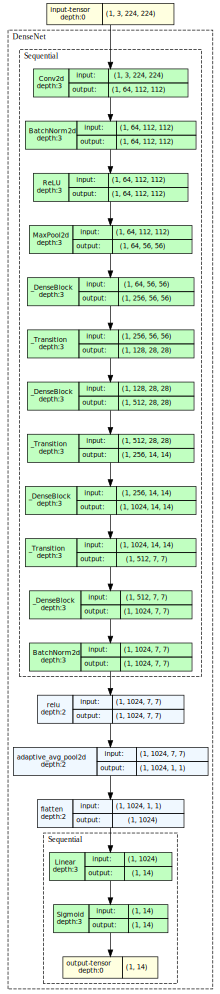

In [ ]:
import torchview
model_graph = torchview.draw_graph(model, input_size=(1, 3, 224, 224),expand_nested=True)
model_graph.visual_graph

In [ ]:
!kaggle datasets download emirhanyldz/chest-xray
!unzip chest-xray.zip -d chest_xray/

Dataset URL: https://www.kaggle.com/datasets/emirhanyldz/chest-xray
License(s): CC0-1.0
 99% 2.09G/2.11G [00:38<00:00, 30.2MB/s]
100% 2.11G/2.11G [00:38<00:00, 58.4MB/s]


In [ ]:
!kaggle datasets download zfturbo/nih-chest-xray-dataset-bbox-for-vinbigdata
!unzip nih-chest-xray-dataset-bbox-for-vinbigdata.zip -d data/

Dataset URL: https://www.kaggle.com/datasets/zfturbo/nih-chest-xray-dataset-bbox-for-vinbigdata
License(s): unknown
 95% 288M/304M [00:01<00:00, 205MB/s]
100% 304M/304M [00:01<00:00, 165MB/s]
Archive:  nih-chest-xray-dataset-bbox-for-vinbigdata.zip
  inflating: data/nih.csv            
  inflating: data/nih/00000032_037.png  
  inflating: data/nih/00000072_000.png  
  inflating: data/nih/00000147_001.png  
  inflating: data/nih/00000149_006.png  
  inflating: data/nih/00000181_061.png  
  inflating: data/nih/00000211_010.png  
  inflating: data/nih/00000211_016.png  
  inflating: data/nih/00000211_019.png  
  inflating: data/nih/00000211_041.png  
  inflating: data/nih/00000344_003.png  
  inflating: data/nih/00000377_004.png  
  inflating: data/nih/00000398_003.png  
  inflating: data/nih/00000457_004.png  
  inflating: data/nih/00000468_017.png  
  inflating: data/nih/00000468_033.png  
  inflating: data/nih/00000468_041.png  
  inflating: data/nih/00000583_008.png  
  inflating: dat

In [ ]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt

df = pd.read_csv('/content/data/nih.csv')
sample = df.iloc[524]

In [ ]:
sample

,524
image_id,00019187_000
class_name,Cardiomegaly
class_id,3
rad_id,R99
x_min,397
y_min,384
x_max,861
y_max,768


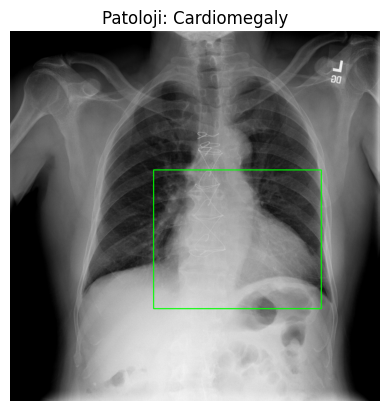

In [ ]:
image_path = f"/content/data/nih/{sample['image_id']}.png"
image = cv2.imread(image_path)

x, y, w, h = sample['x_min'], sample['y_min'], sample['x_max']-sample['x_min'], sample['y_max']-sample['y_min']
cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f"Patoloji: {sample['class_name']}")
plt.axis('off')
plt.show()

In [ ]:
import torch
from torchvision import transforms
from PIL import Image

image_path = f"/content/data/nih/{sample['image_id']}.png"  # Resmin yolu
image = Image.open(image_path).convert('RGB')

class_names = [ 'Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration', 'Mass', 'Nodule', 'Pneumonia',
                'Pneumothorax', 'Consolidation', 'Edema', 'Emphysema', 'Fibrosis', 'Pleural_Thickening', 'Hernia']

preprocess = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0) 

In [ ]:
model.eval()

with torch.no_grad():
    output = model(input_batch)

probabilities = torch.sigmoid(output)
for i, prob in enumerate(probabilities[0]):
    print(f"{class_names[i]}: {prob.item()}")

Atelectasis: 0.5089156627655029
Cardiomegaly: 0.5622631311416626
Effusion: 0.5101699829101562
Infiltration: 0.5444132089614868
Mass: 0.5003794431686401
Nodule: 0.5026417374610901
Pneumonia: 0.5014263987541199
Pneumothorax: 0.5003474950790405
Consolidation: 0.5014608502388
Edema: 0.5004306435585022
Emphysema: 0.500870943069458
Fibrosis: 0.5134536027908325
Pleural_Thickening: 0.5090267062187195
Hernia: 0.5001047253608704


In [ ]:
from torch.autograd import Function
import numpy as np
import cv2
import matplotlib.pyplot as plt

class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self.hook_layers()

    def hook_layers(self):
        def backward_hook(module, grad_input, grad_output):
            self.gradients = grad_output[0]

        def forward_hook(module, input, output):
            self.activations = output

        target_layer = dict(self.model.named_modules())[self.target_layer]
        target_layer.register_forward_hook(forward_hook)
        target_layer.register_backward_hook(backward_hook)

    def generate(self, input_tensor, target_class):

        output = self.model(input_tensor)
        class_score = output[0, target_class]
        self.model.zero_grad()
        class_score.backward(retain_graph=True)

        gradients = self.gradients.detach().cpu().numpy()
        activations = self.activations.detach().cpu().numpy()

        weights = np.mean(gradients, axis=(2, 3))
        cam = np.sum(weights[:, :, np.newaxis, np.newaxis] * activations, axis=1)[0]
        cam = np.maximum(cam, 0)  # ReLU
        cam = cv2.resize(cam, (input_tensor.size(2), input_tensor.size(3)))
        cam = cam - np.min(cam)
        cam = cam / np.max(cam)
        return cam


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1827: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


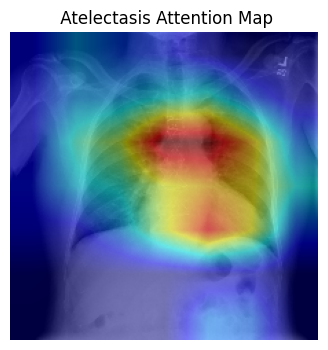

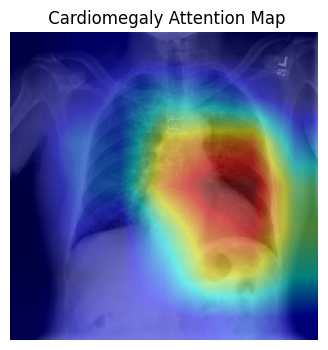

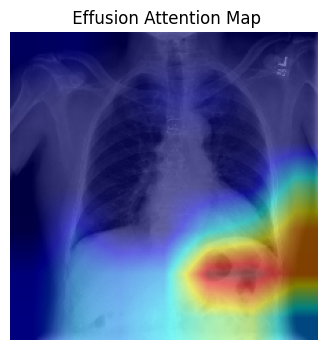

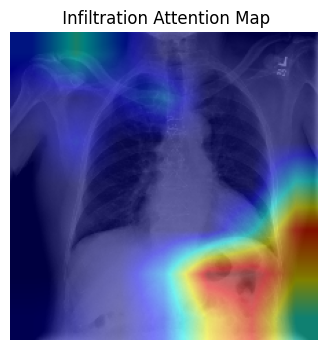

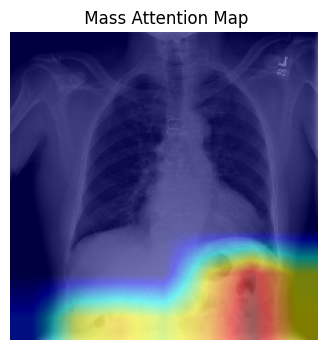

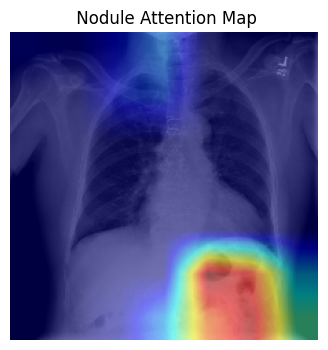

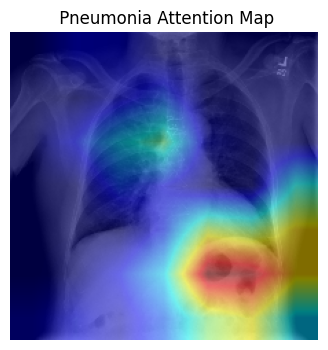

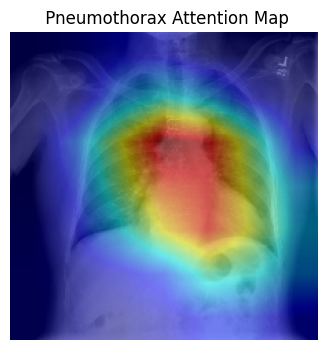

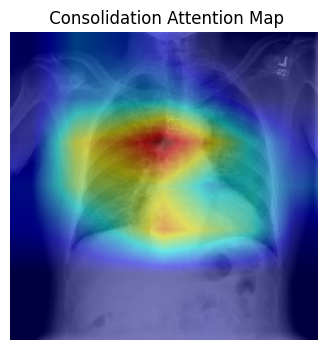

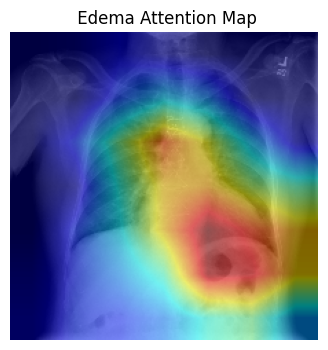

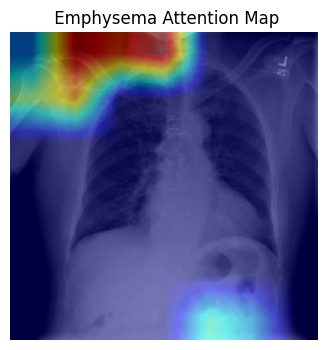

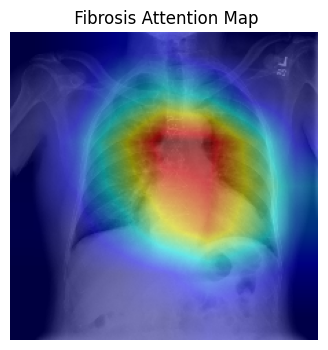

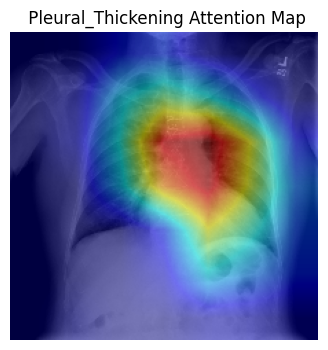

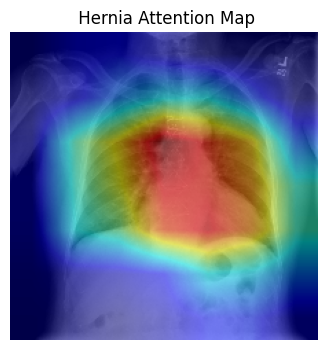

In [ ]:
from torchvision import transforms
from PIL import Image

grad_cam = GradCAM(model, target_layer="densenet121.features.denseblock4.denselayer16.conv2")

for target_class in range(14):
    cam = grad_cam.generate(input_batch, target_class)

    cam_img = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    original_image = cv2.imread(image_path)
    original_image = cv2.resize(original_image, (224, 224))
    overlay = cv2.addWeighted(original_image, 0.5, cam_img, 0.5, 0)

    plt.figure(figsize=(4, 4))
    plt.title(f" {class_names[target_class]} Attention Map")
    plt.imshow(overlay[:, :, ::-1])  
    plt.axis('off')
    plt.show()


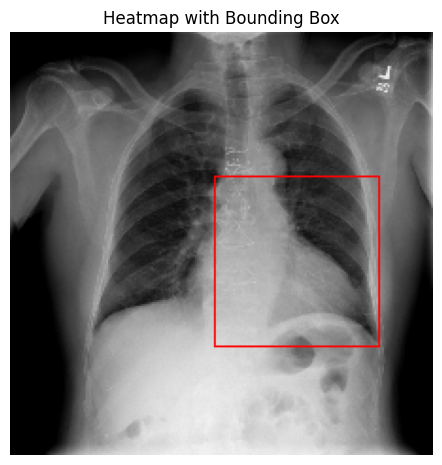

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def generate_bounding_box(cam, threshold=0.5):
    """
    Grad-CAM'den gelen heatmap üzerinden bounding box oluşturma.

    Args:
        cam (numpy.ndarray): Grad-CAM heatmap (0-1 arasında normalize edilmiş).
        threshold (float): Yoğunluk eşik değeri (default: 0.5).

    Returns:
        boxes (list of tuples): Bounding box koordinatları (x, y, w, h).
        binary_mask (numpy.ndarray): Heatmap'e uygulanan binary mask.
    """
    binary_mask = (cam >= threshold).astype(np.uint8)

    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    boxes = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour) 
        boxes.append((x, y, w, h))

    return boxes, binary_mask

threshold = 0.7
cam_example = grad_cam.generate(input_batch, 1)
boxes, binary_mask = generate_bounding_box(cam_example, threshold=threshold)

original_image = cv2.imread(image_path)
original_image = cv2.resize(original_image, (224, 224))
for (x, y, w, h) in boxes:
    cv2.rectangle(original_image, (x, y), (x + w, y + h), (0, 0, 255), 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Heatmap with Bounding Box")
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


In [ ]:
!pip install -qU gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.0 MB/s eta 0:00:00


In [ ]:
def predict_and_visualize(image):
    input_tensor = preprocess(image).unsqueeze(0)

    with torch.no_grad():
        outputs = model(input_tensor)
    predictions = torch.sigmoid(outputs)

    predicted_labels = {class_names[i]: f'{prob.item():.3f}' for i, prob in enumerate(predictions[0])}

    output_text = "\n".join([f"{label}: {prob}" for label, prob in predicted_labels.items()])

    heatmap = grad_cam.generate(input_tensor, 1)

    original_width, original_heigth = image.size
    boxes, _ = generate_bounding_box(heatmap, threshold=0.7)

    boxes_resized = []
    for (x, y, w, h) in boxes:
        x_resized = int(x * (original_width / 224))
        y_resized = int(y * (original_heigth / 224))
        w_resized = int(w * (original_width / 224))
        h_resized = int(h * (original_heigth / 224))
        boxes_resized.append((x_resized, y_resized, w_resized, h_resized))

    image_with_boxes = np.array(image.copy())
    for(x, y, w, h) in boxes_resized:
        cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 0, 255), 2)

    heatmap_resized = cv2.resize(heatmap, (original_width,original_heigth))

    heatmap_img = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    overlay = cv2.addWeighted(np.array(image), 0.5, heatmap_img, 0.5, 0)
    grad_cam_result = Image.fromarray(overlay[:, :, ::-1])

    return output_text, grad_cam_result, Image.fromarray(image_with_boxes)


In [ ]:
import gradio as gr

input_image = gr.Image(type="pil", label="Input Image")
output_labels = gr.Textbox(label="Predictions")
output_image = gr.Image(type="pil", label="Grad-CAM Visualization")
output_boxes = gr.Image(type="pil", label="Bounding Boxes")

gr.Interface(
    fn=predict_and_visualize,
    inputs=input_image,
    outputs=[output_labels, output_image, output_boxes],
    title="DenseNet121 Multi-label Classifier with Grad-CAM",
    description="Upload an image to classify and visualize Grad-CAM localization."
).launch(debug=True)


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://d455489840075bbcbb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1827: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://d455489840075bbcbb.gradio.live
